In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [96]:
df=pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv",header=1)

In [97]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [99]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [100]:
df[df.isnull().any(axis=1)==True]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [101]:
df.loc[:122,"Region"]=0
df.loc[122:,"Region"]=1

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


In [103]:
df["Region"]=df["Region"].astype(int)

In [104]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1
245,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,1


In [105]:
df[(df.isnull().any(axis=1)==True)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,1


In [106]:
df.drop(index=122,axis=1,inplace=True)

In [107]:
df=df.dropna().reset_index(drop=True)

In [108]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [109]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [110]:
df.iloc[[122]]


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [111]:
df=df.drop(index=122).reset_index(drop=True)

In [112]:
df.shape

(243, 15)

In [113]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [114]:
#fix columns spaces
df.columns=df.columns.str.strip()

In [115]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 28.6+ KB


In [117]:
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']]=df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

In [118]:
obj=[i for i in df.columns if df[i].dtypes=="O"]

In [119]:
obj

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [120]:
for i in obj:
    if i!='Classes':
        df[i]=df[i].astype(float)

In [121]:
df["Classes"]=df["Classes"].str.strip()

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [123]:
#save the dataset
# df.to_csv('Algerian_forest_fires_cleaned_dataset.csv',index=False)

In [124]:
df_copy=df.iloc[:,3:]

In [125]:
df_copy

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [126]:
#encodeing the categorial varibale 

In [127]:
df_copy["Classes"]=df_copy["Classes"].map({"not fire":0,"fire":1})

In [128]:
# df_copy["Classes"]=np.where(df_copy["Classes"]=="not fire",0,1)

In [129]:
df_copy["Classes"].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [130]:
import seaborn as sns

array([[<Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'RH'}>, <Axes: title={'center': 'Ws'}>],
       [<Axes: title={'center': 'Rain'}>,
        <Axes: title={'center': 'FFMC'}>,
        <Axes: title={'center': 'DMC'}>],
       [<Axes: title={'center': 'DC'}>, <Axes: title={'center': 'ISI'}>,
        <Axes: title={'center': 'BUI'}>],
       [<Axes: title={'center': 'FWI'}>,
        <Axes: title={'center': 'Classes'}>,
        <Axes: title={'center': 'Region'}>]], dtype=object)

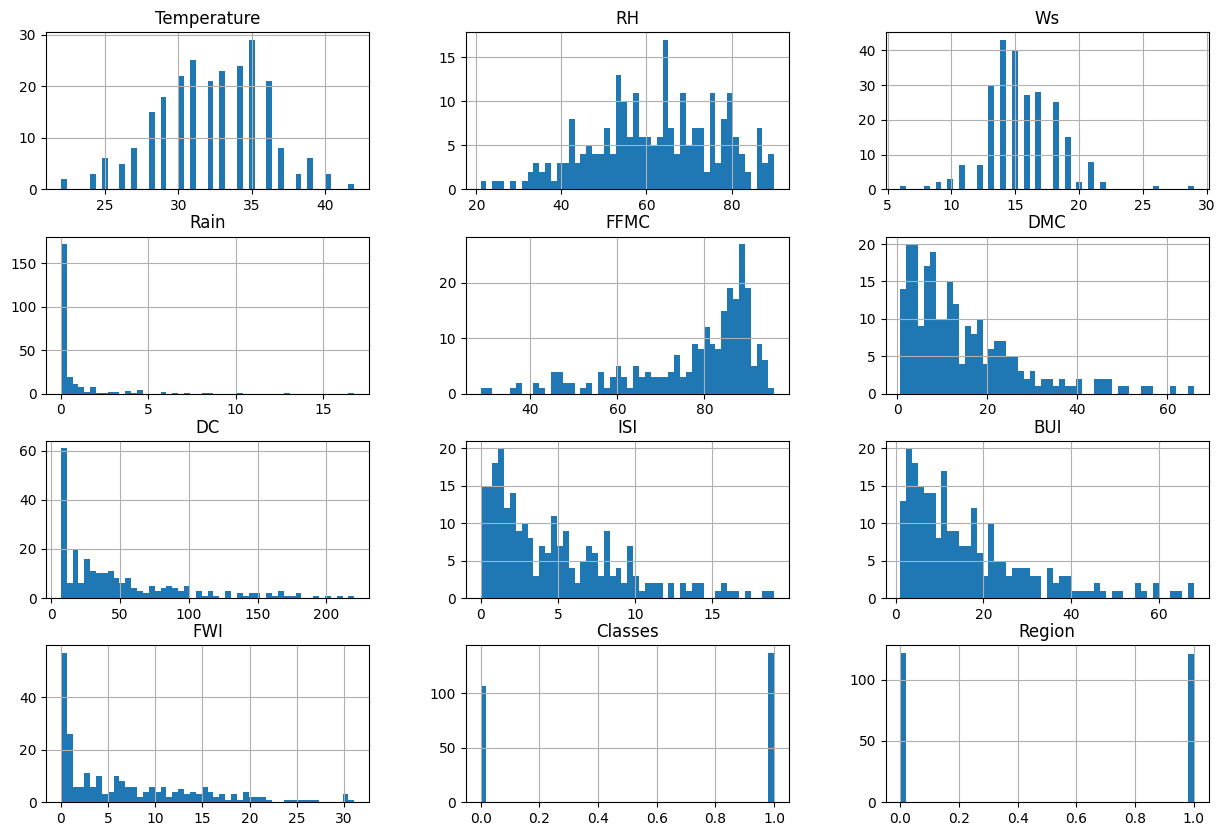

In [131]:
#basic
df_copy.hist(bins=50,figsize=(15,10))

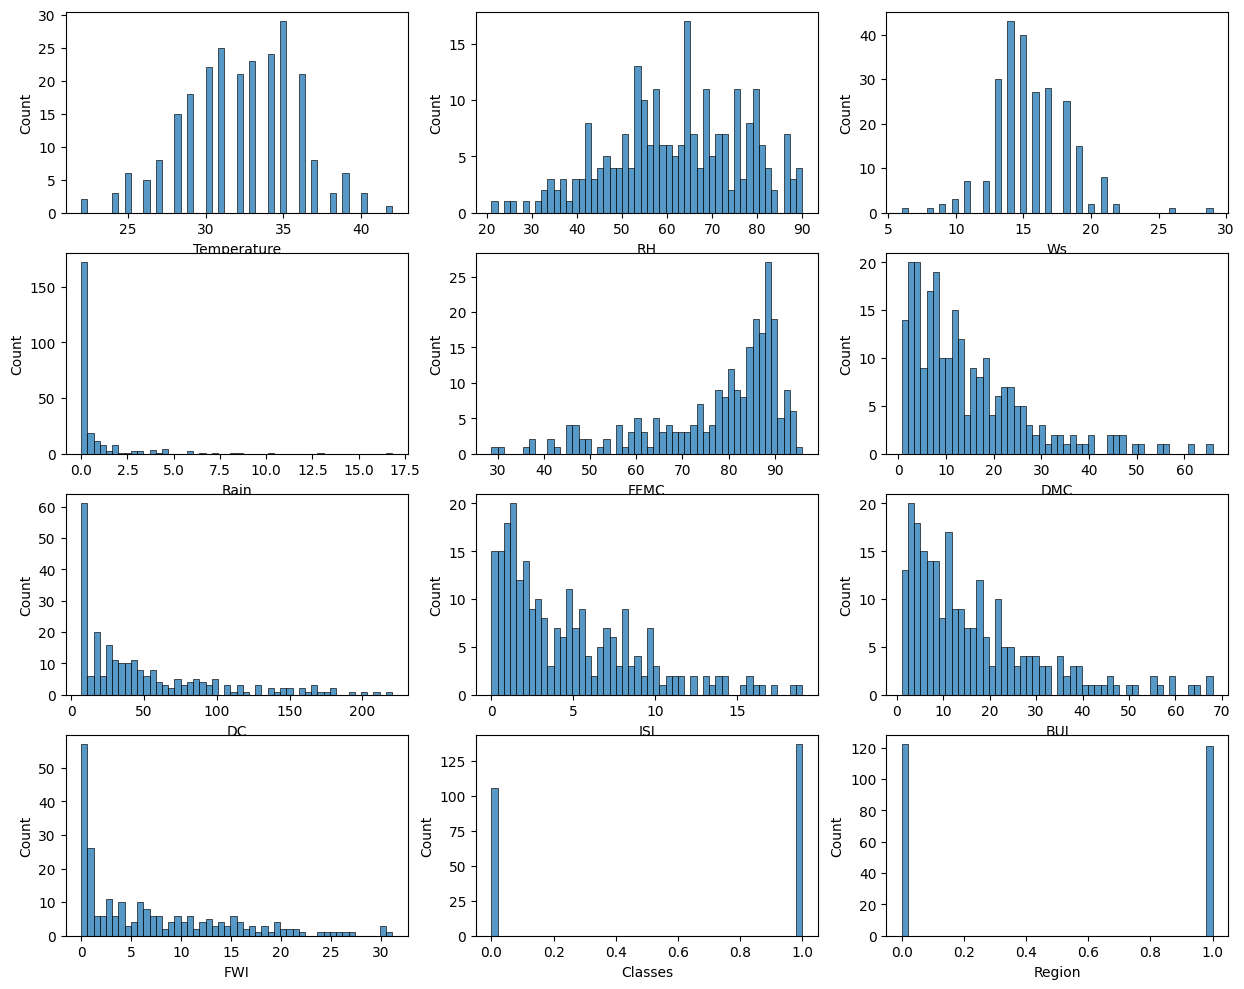

In [132]:
#matplotlib
plt.figure(figsize=(15,12))
for i in range(1,len(df_copy.columns)+1):
    plt.subplot(4,3,i)
    sns.histplot(df_copy[df_copy.columns[i-1]],bins=50)

In [133]:
#find percentage in every columns 
df_copy["Classes"].value_counts(normalize=True)*100

Classes
1    56.378601
0    43.621399
Name: proportion, dtype: float64

([<matplotlib.patches.Wedge at 0x1ce0ba7de50>,
 [Text(-0.2189564657232264, 1.0779879712306597, 'fire'),
  Text(0.21895655996393085, -1.0779879520888727, 'not fire')],
 [Text(-0.11943079948539621, 0.5879934388530871, '56.4%'),
  Text(0.11943085088941681, -0.5879934284121123, '43.6%')])

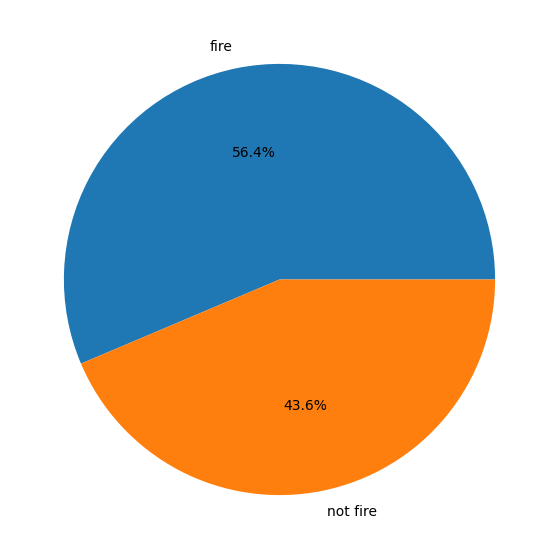

In [134]:
plt.figure(figsize=(10,7))
plt.pie(df_copy["Classes"].value_counts(),labels=["fire","not fire"],autopct="%1.1f%%")

<Axes: >

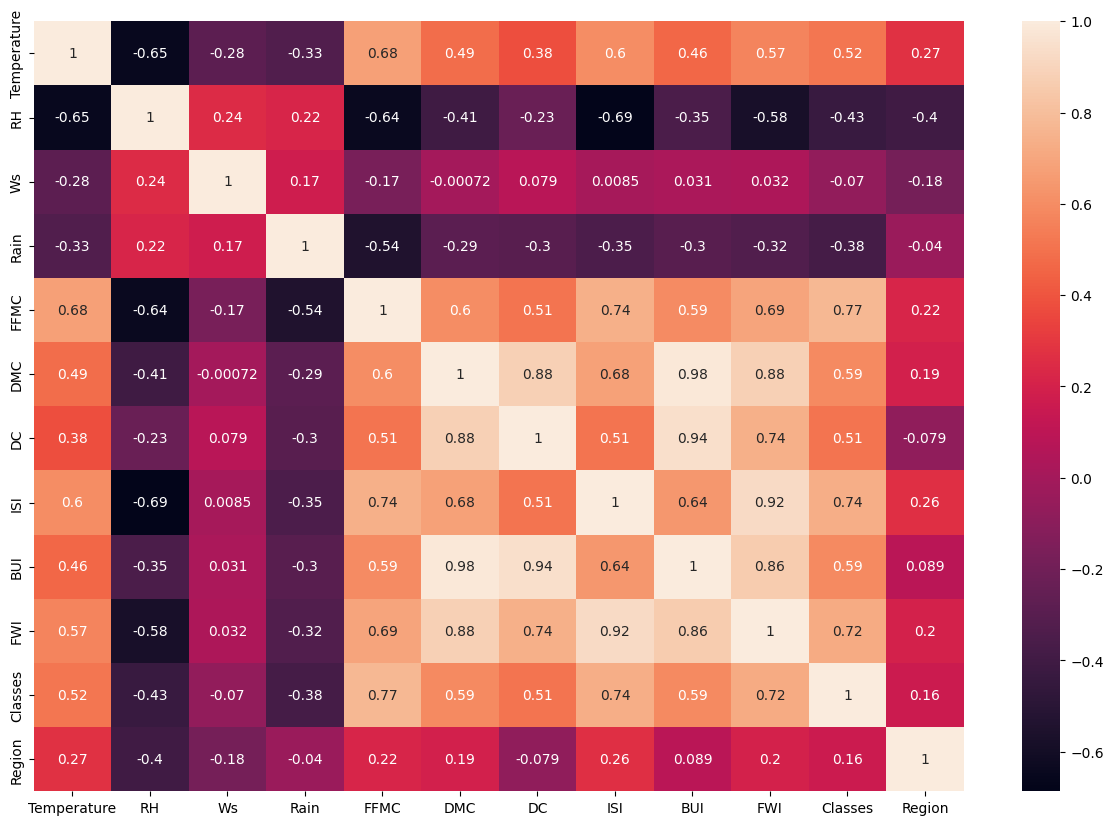

In [135]:
plt.figure(figsize=(15,10))
sns.heatmap(df_copy.corr(),annot=True)

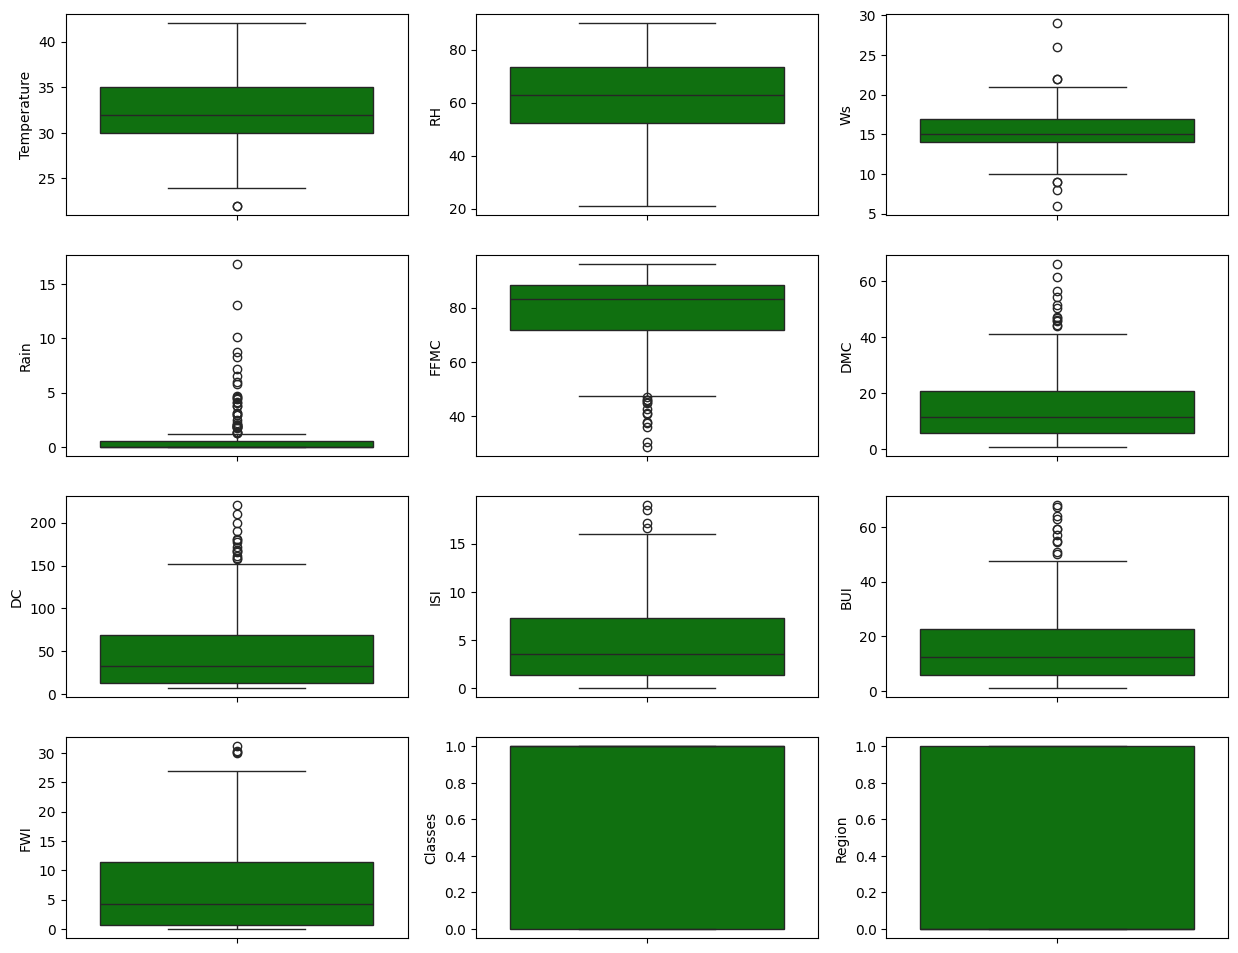

In [136]:
#matplotlib
plt.figure(figsize=(15,12))
for i in range(1,len(df_copy.columns)+1):
    plt.subplot(4,3,i)
    sns.boxplot(df_copy[df_copy.columns[i-1]],color="g")

In [137]:
df_copy

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


Text(0.5, 1.0, 'Fire Analysis of Sidi- Bel Regions')

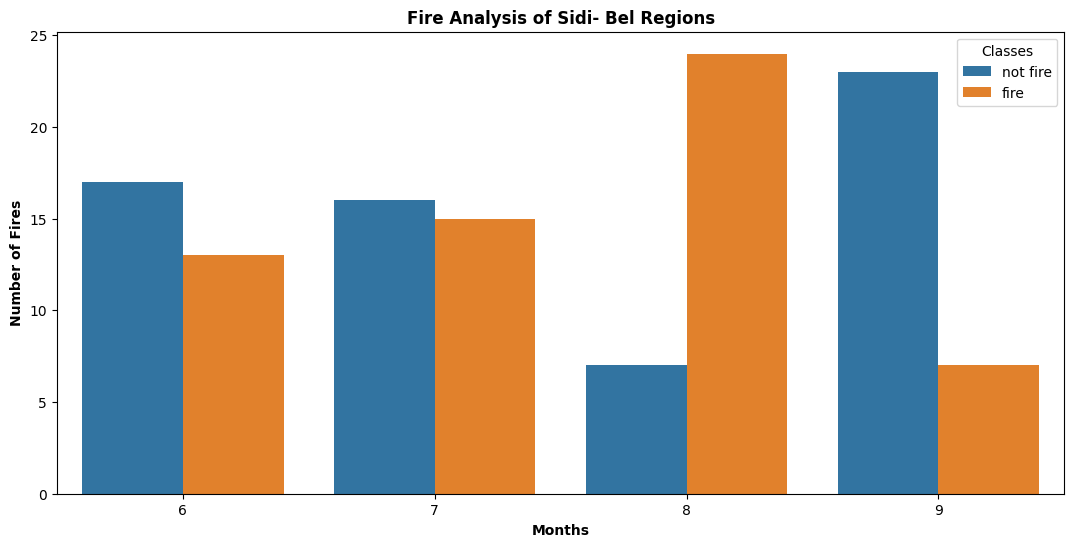

In [138]:
plt.subplots(figsize=(13,6))
sns.countplot(df[df["Region"]==0],x="month",hue="Classes")
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Sidi- Bel Regions",weight='bold')

Text(0.5, 1.0, 'Fire Analysis of Sidi- Bel Regions')

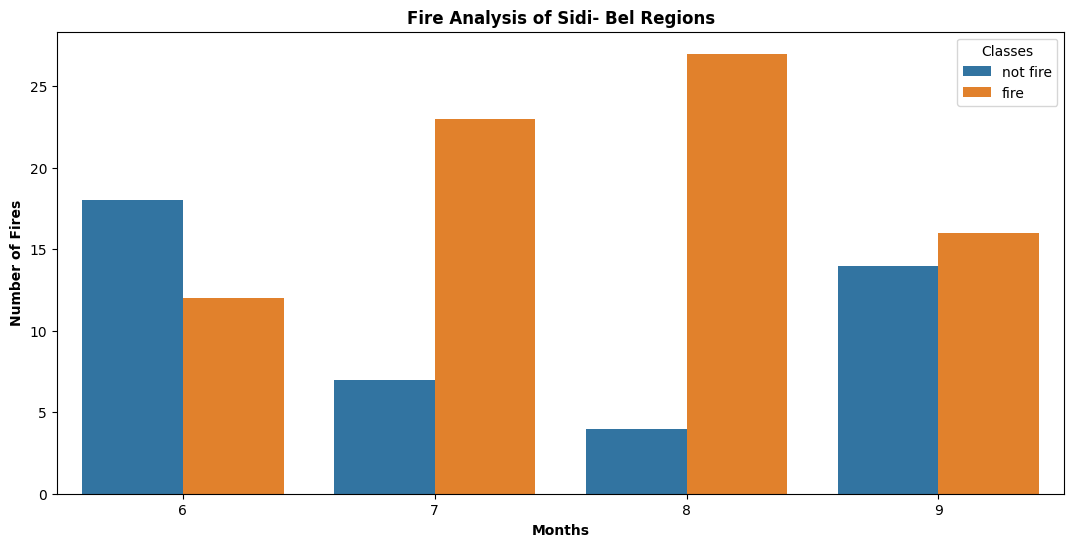

In [139]:
plt.subplots(figsize=(13,6))
sns.countplot(df[df["Region"]==1],x="month",hue="Classes")
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Sidi- Bel Regions",weight='bold')

Model Training

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [141]:
df=pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [142]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [143]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [144]:
df.drop(['day', 'month', 'year'],axis=1,inplace=True)

In [145]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [146]:
df["Classes"]=df["Classes"].str.strip()

In [147]:
df["Classes"]=df["Classes"].map({"not fire":0,"fire":1})

In [148]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [149]:
x=df.drop("FWI",axis=1)
y=df["FWI"]

In [150]:
x.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [151]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75,random_state=42)

In [152]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape,

((182, 11), (61, 11), (182,), (61,))

Feature selection 

<Axes: >

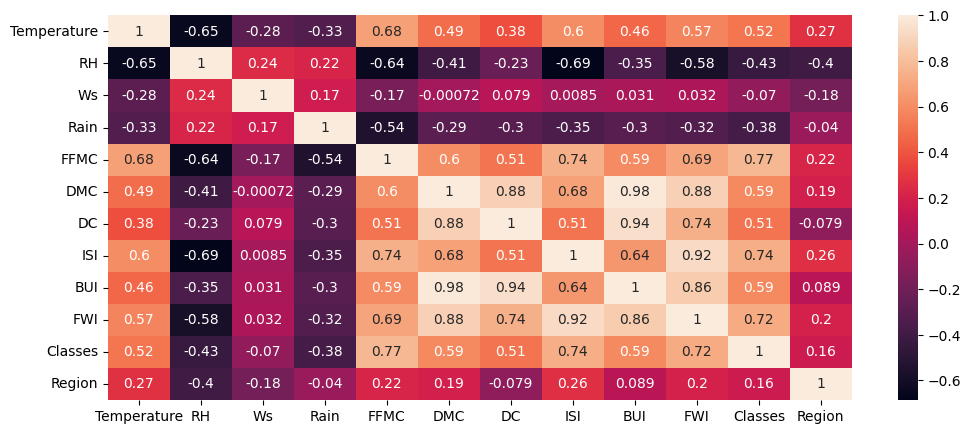

In [153]:
#omit high positive correlated features
#multicolinearity
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(),annot=True)

In [154]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [155]:
## threshold--Domain expertise
corr_features=correlation(x_train,0.85)
corr_features

{'BUI', 'DC'}

In [174]:
x_train.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'ISI', 'Classes',
       'Region'],
      dtype='object')

In [156]:
## drop features when correlation is more than 0.85 
x_train.drop(corr_features,axis=1,inplace=True)
x_test.drop(corr_features,axis=1,inplace=True)
x_train.shape,x_test.shape

((182, 9), (61, 9))

In [157]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_std=scaler.fit_transform(x_train)
x_test_std=scaler.transform(x_test)

In [175]:
x_train_std

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

<Axes: >

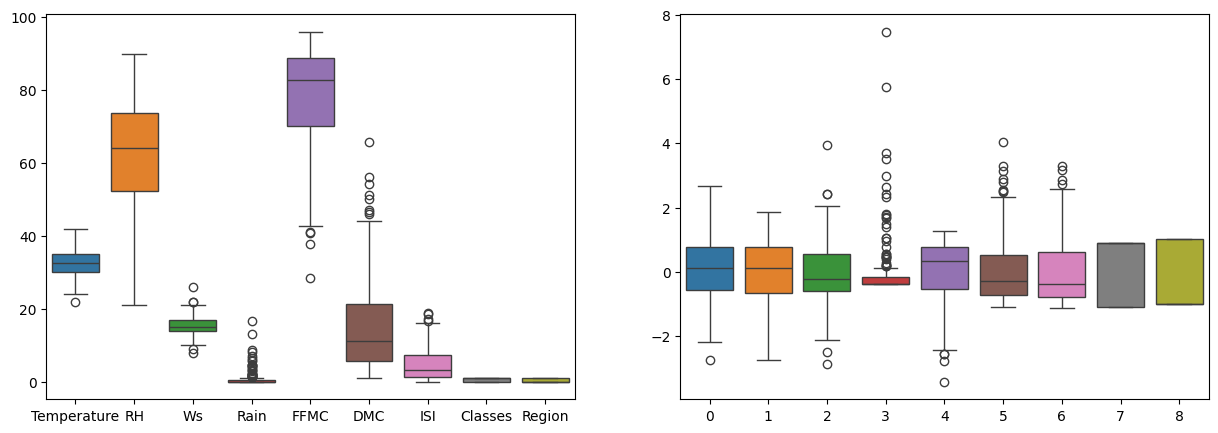

In [159]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(x_train)
plt.subplot(1,2,2)
sns.boxplot(x_train_std)

Linear reg

0.674276687379158 0.9847657384266951 0.5468236465249978


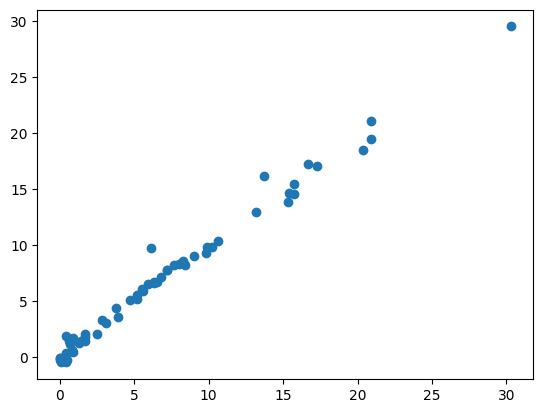

In [160]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
Linear=LinearRegression()
Linear.fit(x_train_std,y_train)
y_pred=Linear.predict(x_test_std)
print(mean_squared_error(y_test,y_pred),r2_score(y_test,y_pred),mean_absolute_error(y_test,y_pred))
plt.scatter(y_test,y_pred)

Lasso reg

2.2483458918974772 0.9492020263112388 1.133175994914409


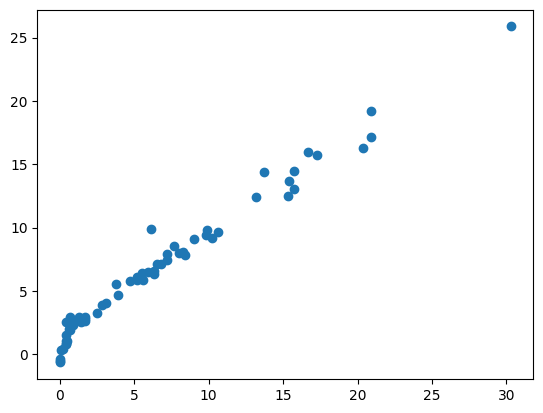

In [161]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
Lasso=Lasso()
Lasso.fit(x_train_std,y_train)
y_pred=Lasso.predict(x_test_std)
print(mean_squared_error(y_test,y_pred),r2_score(y_test,y_pred),mean_absolute_error(y_test,y_pred))
plt.scatter(y_test,y_pred)

Ridge

0.6949198918152096 0.9842993364555512 0.5642305340105715


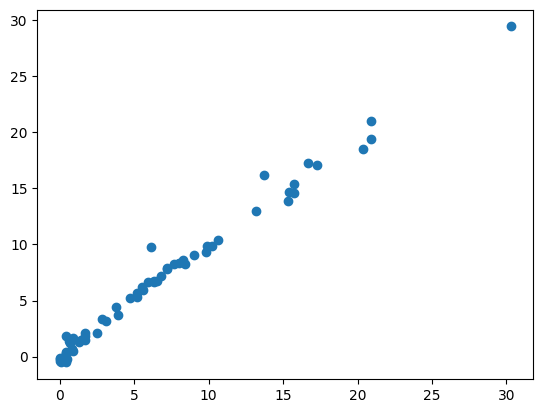

In [162]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
Ridge=Ridge()
Ridge.fit(x_train_std,y_train)
y_pred=Ridge.predict(x_test_std)
print(mean_squared_error(y_test,y_pred),r2_score(y_test,y_pred),mean_absolute_error(y_test,y_pred))
plt.scatter(y_test,y_pred)

Elastic

5.5172511010252245 0.8753460589519703 1.8822353634896005


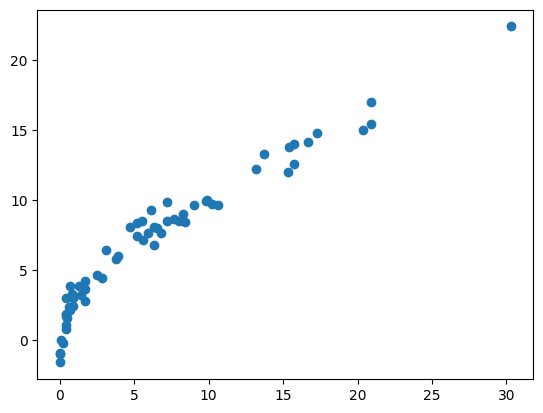

In [163]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
Elastic=ElasticNet()
Elastic.fit(x_train_std,y_train)
y_pred=Elastic.predict(x_test_std)
print(mean_squared_error(y_test,y_pred),r2_score(y_test,y_pred),mean_absolute_error(y_test,y_pred))
plt.scatter(y_test,y_pred)

Hyperparameter tuning

Lasso_CV

0.792499555474362 0.9820946715928275 0.619970115826343


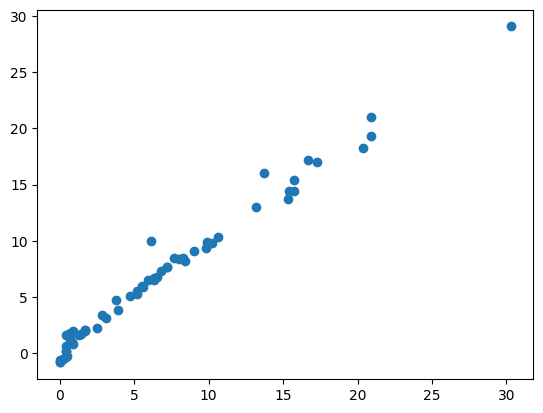

In [164]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(x_train_std,y_train)
y_pred=lassocv.predict(x_test_std)
print(mean_squared_error(y_test,y_pred),r2_score(y_test,y_pred),mean_absolute_error(y_test,y_pred))
plt.scatter(y_test,y_pred)

In [165]:
lassocv.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

Ridge_Cv

0.6949198918152096 0.9842993364555512 0.5642305340105715


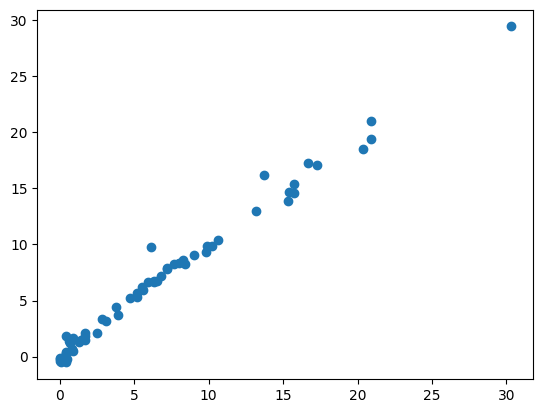

In [166]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
Ridgecv=RidgeCV(cv=5)
Ridgecv.fit(x_train_std,y_train)
y_pred=Ridgecv.predict(x_test_std)
print(mean_squared_error(y_test,y_pred),r2_score(y_test,y_pred),mean_absolute_error(y_test,y_pred))
plt.scatter(y_test,y_pred)

In [167]:
Ridgecv.alphas

(0.1, 1.0, 10.0)

0.8222830416276258 0.9814217587854941 0.6575946731430898


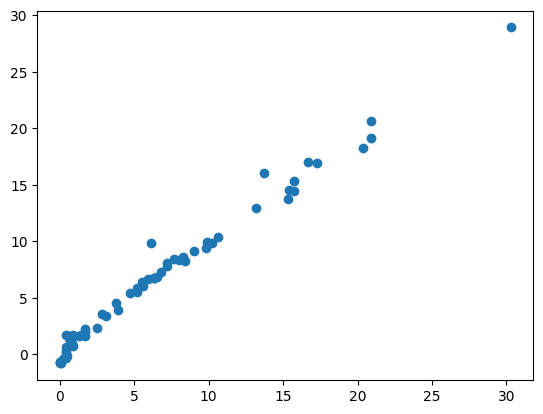

In [168]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
ElasticCV=ElasticNetCV(cv=5)
ElasticCV.fit(x_train_std,y_train)
y_pred=ElasticCV.predict(x_test_std)
print(mean_squared_error(y_test,y_pred),r2_score(y_test,y_pred),mean_absolute_error(y_test,y_pred))
plt.scatter(y_test,y_pred)

In [169]:
ElasticCV.alphas_

array([14.11706004, 13.16561744, 12.27829889, 11.45078264, 10.67903821,
        9.95930678,  9.28808283,  8.66209714,  8.07830078,  7.53385034,
        7.02609405,  6.55255882,  6.11093829,  5.6990815 ,  5.31498248,
        4.95677045,  4.62270071,  4.31114616,  4.02058933,  3.74961507,
        3.49690356,  3.26122397,  3.04142839,  2.83644629,  2.64527931,
        2.46699633,  2.30072904,  2.1456676 ,  2.00105679,  1.86619226,
        1.74041714,  1.62311885,  1.51372607,  1.411706  ,  1.31656174,
        1.22782989,  1.14507826,  1.06790382,  0.99593068,  0.92880828,
        0.86620971,  0.80783008,  0.75338503,  0.7026094 ,  0.65525588,
        0.61109383,  0.56990815,  0.53149825,  0.49567705,  0.46227007,
        0.43111462,  0.40205893,  0.37496151,  0.34969036,  0.3261224 ,
        0.30414284,  0.28364463,  0.26452793,  0.24669963,  0.2300729 ,
        0.21456676,  0.20010568,  0.18661923,  0.17404171,  0.16231189,
        0.15137261,  0.1411706 ,  0.13165617,  0.12278299,  0.11

In [170]:
scaler

StandardScaler()

In [171]:
Ridge

Ridge()

In [172]:
import os
os.getcwd()

'c:\\Users\\Aishwarya MMPL\\Documents\\GUVI_PYTHON\\Udemy\\ML\\Complete-Data-Science-With-Machine-Learning-And-NLP-2024-main\\4-Ridge Lasso And Elasticnet\\Ridge Lassso Elastic Regression Practicals'

In [173]:
import pickle